In [152]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [153]:
#importing Titanic dataset
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')

In [154]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


This is the dataset of Titanic with 891 rows and 12 columns.

In [155]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This is the first 4 rows and columns.

In [156]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


This last 4 rows and columns of dataset.

In [157]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Names of the columns.

In [158]:
df.shape

(891, 12)

Total no of rows 891 and columns 12.

In [159]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

This shows dtype of the columns.
There are 5 int64, 2 float64 and 5 object dtype

In [160]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

This shows null value of the columns.
There are missing values in the column Age, cabin and Embarked.
177 missing values in age, 687 in cabin and 2 in embarked.

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This gives the overview of the dataset. 
The count of rows, columns,present of null values, dtypes

<Axes: >

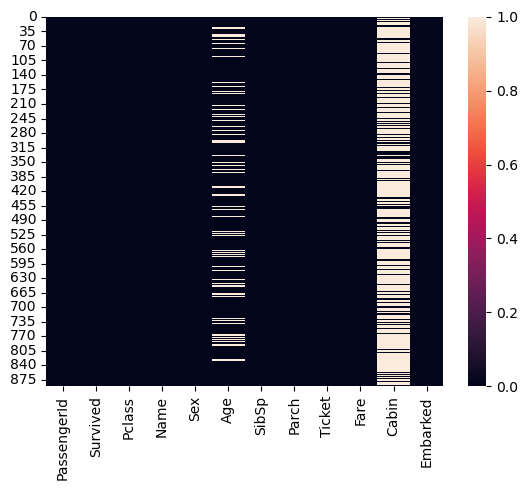

In [162]:
sns.heatmap(df.isnull())

Visualization of the presence of null value through heatmap.
from this we can see that there are null values present in the dataset.

In [163]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#This shows the statistical information of the numericalcolumns. 

The count of all columns are not same as there is missing value in the Age column.
The mean value is greater than median(50%) in most of the columns, which means data is skewed to the right.
There is difference between the max and 75% so there are outliers present in the data.
The standard deviation,25% percentile value and min can be notice by this describe method.


In [164]:
df['Sex'].value_counts(dropna=True)

male      577
female    314
Name: Sex, dtype: int64

Total count of male and femal.

In [165]:
df['Age'].value_counts(dropna=True)

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

Value count of the different age group.

In [166]:
df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


mean of the survived passengers

In [167]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


This shows the correlation between dependent and independent variables.We can see this by heatmap.

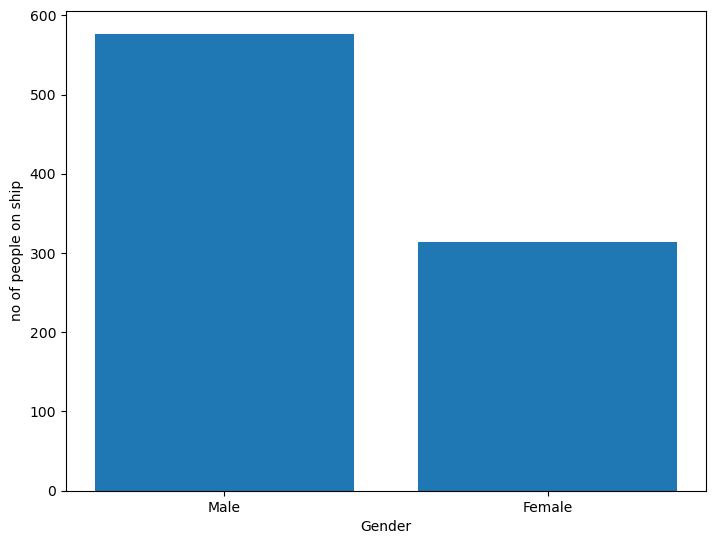

In [168]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
index=[577,314]
ax.bar(gender,index)
plt.xlabel('Gender')
plt.ylabel('no of people on ship')
plt.show()

data visualization through bargraph, showing the male and female ratio.
The male ratio is much higher than female.

In [169]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


This shows the survived ratio of male and female, where female survived ratio is more than the male.

<Axes: xlabel='Survived', ylabel='Density'>

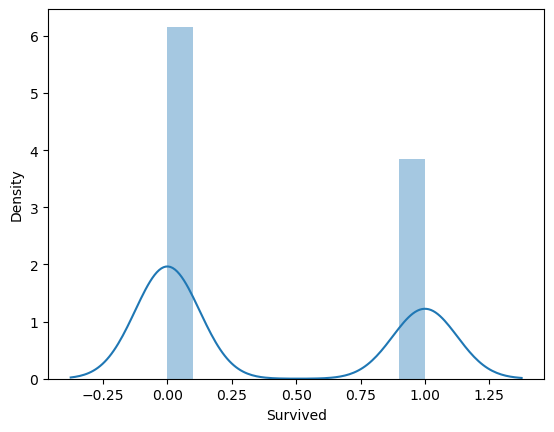

In [170]:
#survival rate
sns.distplot(df['Survived'],bins=10,kde=True)

This shows the density of the survived people.The density of survived is high in minuses area. 

Text(0.5, 1.0, 'Titanic details')

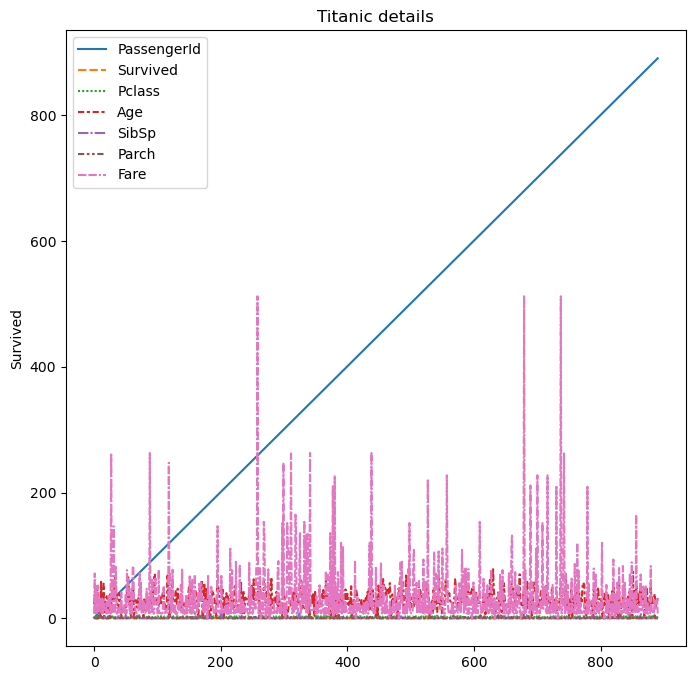

In [171]:
plt.figure(figsize=(8,8))
sns.lineplot(data=df.iloc[:,:-1])
plt.ylabel('Survived')
plt.title('Titanic details')

Passangers details through line plot.

In [172]:
df.nunique().to_frame('No of unique values')

,No of unique values
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


Unique value count of all columns.

In [173]:
#converting caterogical data into numerical data
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'C':0,'S':1,'Q':2})

In [174]:
np.mean(df['Age'])

29.69911764705882

mean value of Age column.

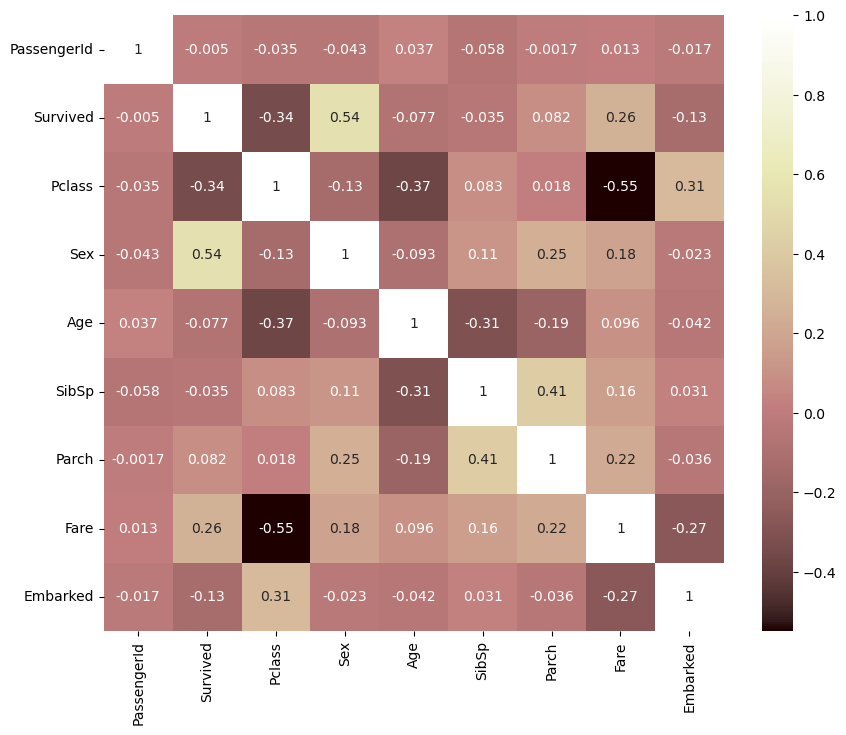

In [175]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='pink',annot=True)
plt.show()

This shows correlation of the survival with other factors.
Here we can see that fare is negatively correlated with pclass.
sex is positively correlated with survived.


In [176]:
df['Age'].fillna('0',inplace=True)
df['Embarked'].fillna('0',inplace=True)

filling the null values with 0.

In [177]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0
5,6,0,3,"Moran, Mr. James",0,0,0,0,330877,8.4583,NaN,2.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,0.0


checking after filling null values.

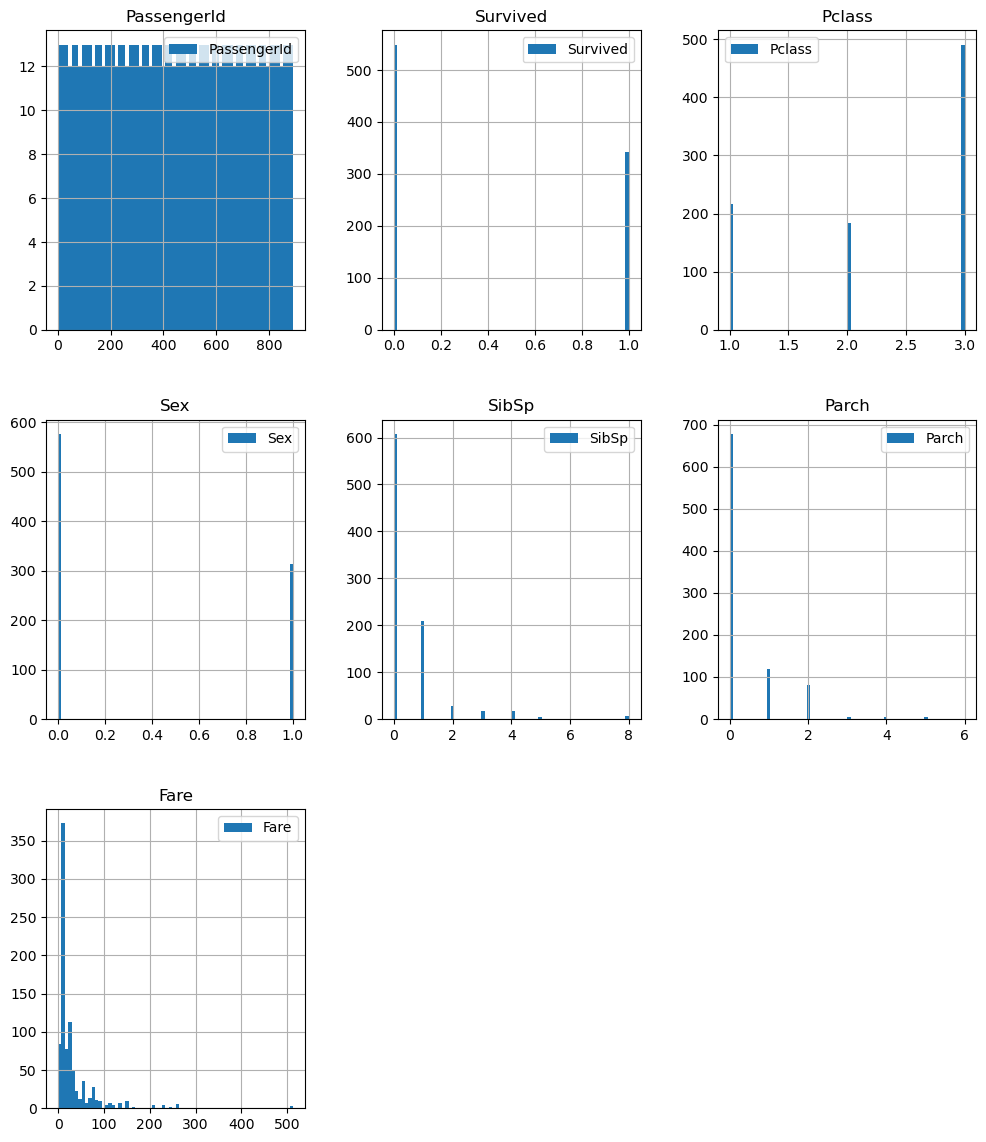

In [178]:
df.hist(bins=70, figsize=(12,14),legend=True)
plt.show()

histograph of all columns.

<Axes: >

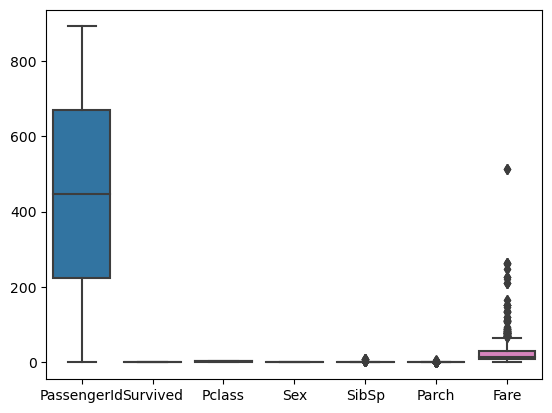

In [179]:
#dropping of duplicates values
df.drop_duplicates(inplace=True)
sns.boxplot(df)

In [180]:
# dropping invalid column
df.drop(['Name'],axis=1,inplace=True)
df.drop(['Ticket'],axis=1,inplace=True)
df.drop(['Cabin'],axis=1,inplace=True)

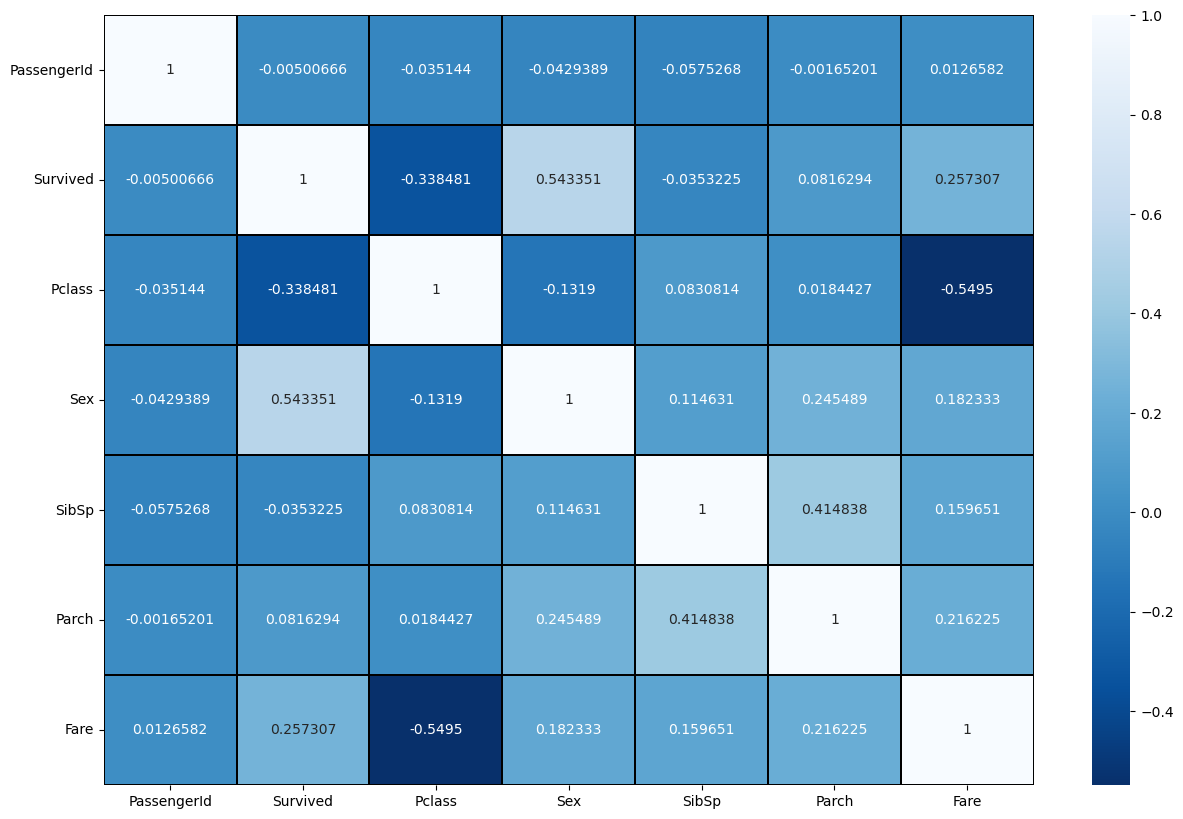

In [181]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=0.1,fmt='1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0);
plt.show()

checking correlation after dropping of the columns.

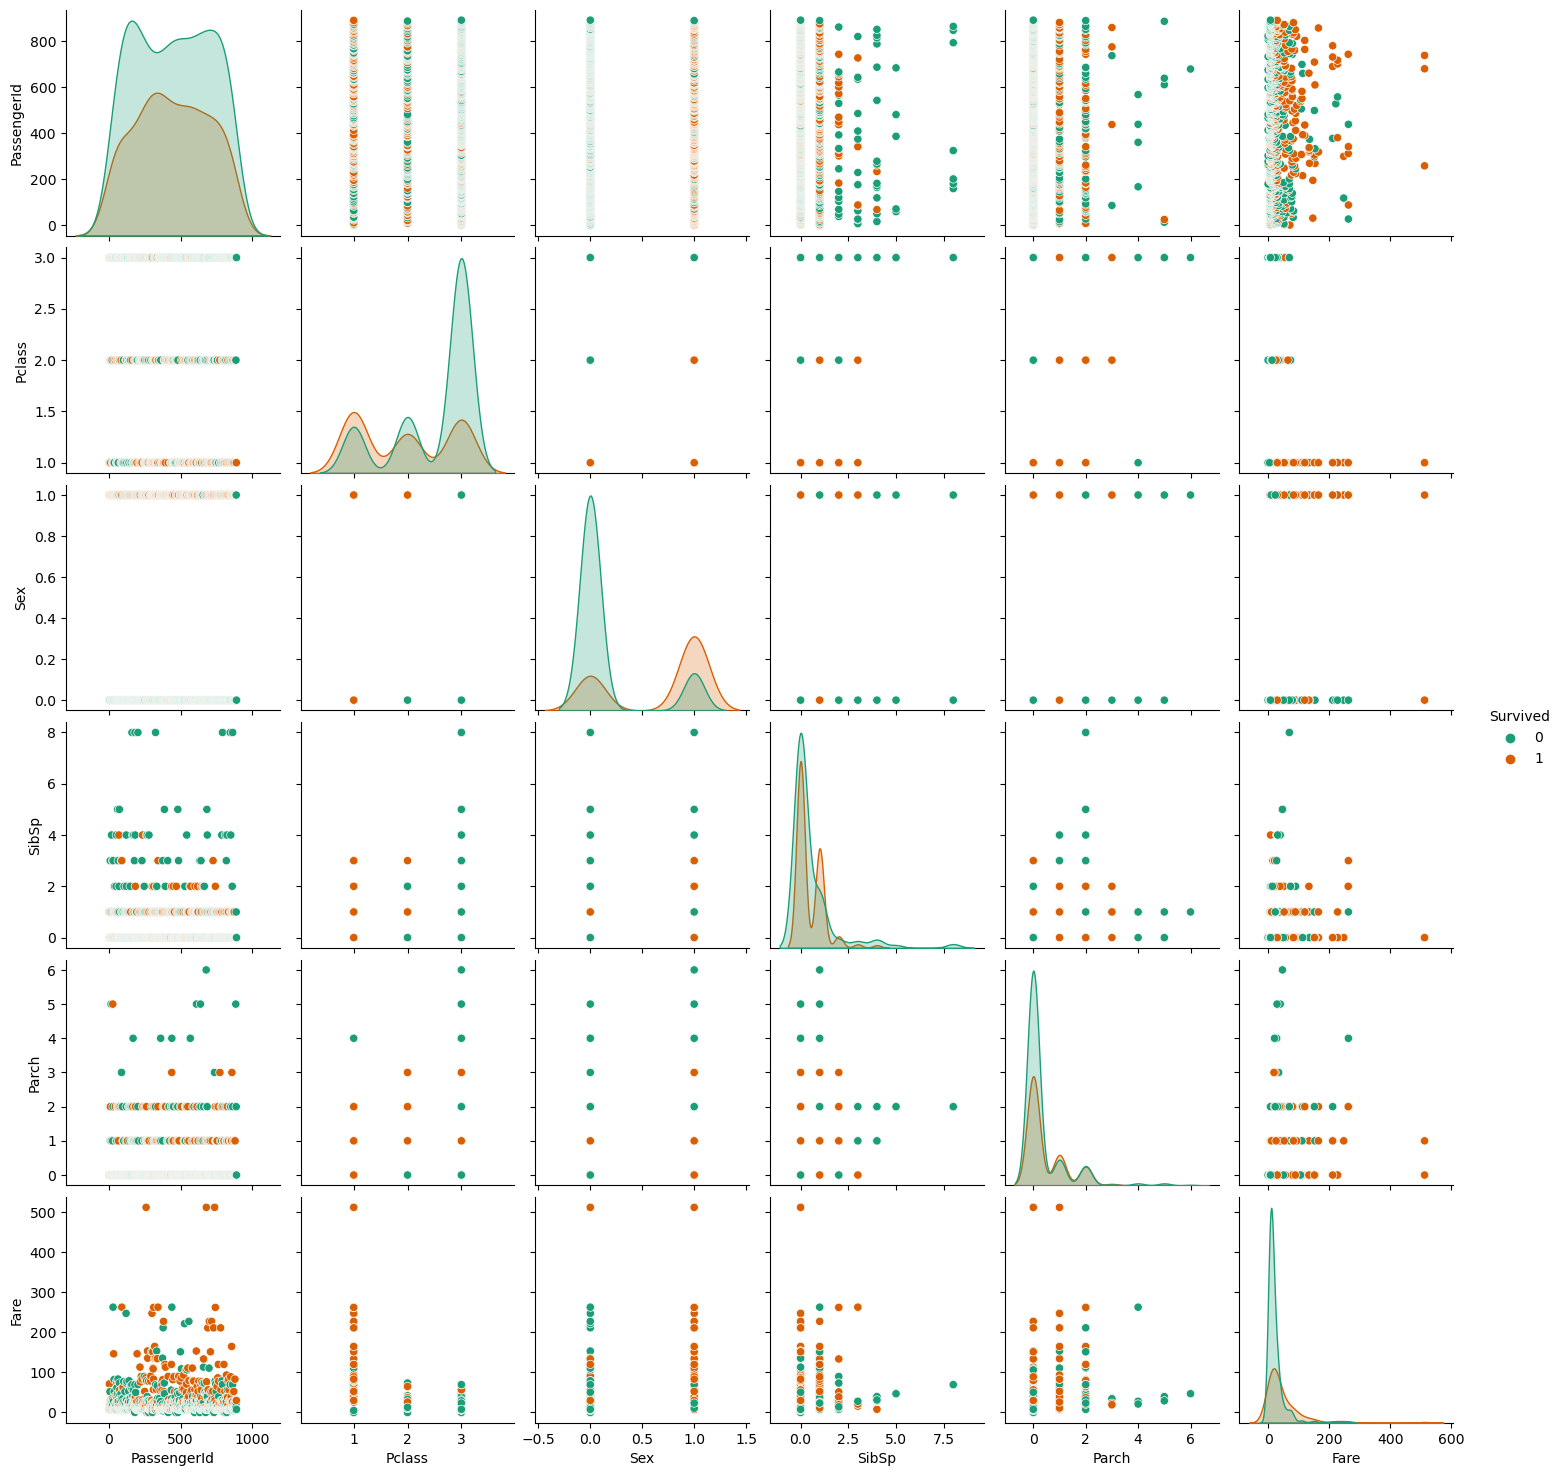

In [182]:
sns.pairplot(df,hue='Survived',palette='Dark2')
plt.show()

Visualization through pairplot.

PassengerId       Axes(0.125,0.786098;0.227941x0.0939024)
Survived       Axes(0.398529,0.786098;0.227941x0.0939024)
Pclass         Axes(0.672059,0.786098;0.227941x0.0939024)
Sex               Axes(0.125,0.673415;0.227941x0.0939024)
SibSp          Axes(0.398529,0.673415;0.227941x0.0939024)
Parch          Axes(0.672059,0.673415;0.227941x0.0939024)
Fare              Axes(0.125,0.560732;0.227941x0.0939024)
dtype: object

<Figure size 1500x2000 with 0 Axes>

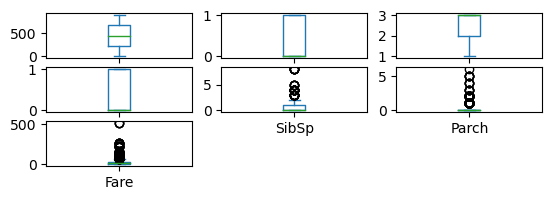

In [183]:
#checking for outliers
fig=plt.figure(figsize=(15,20))
df.plot(kind='box',subplots=True,layout=(7,3))

We can see the presence of outliers in the column sibsp, parch and fare.

In [184]:
#checking skewness
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex            0.618921
Age            0.262862
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -0.144643
dtype: float64

In [185]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [186]:
#removing skewness
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [187]:
x.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex            0.618921
Age            0.262862
SibSp          1.661245
Parch          1.675439
Fare           0.394928
dtype: float64

In [188]:
#removing skewness from parch and sibsp column 
x['SibSp']=np.cbrt(x['SibSp'])
x['Parch']=np.cbrt(x['Parch'])

In [189]:
x.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex            0.618921
Age            0.262862
SibSp          0.858037
Parch          1.269185
Fare           0.394928
dtype: float64

In [190]:
#seperating independent and target variables
x=df.drop('Survived',axis=1)
y=df['Survived']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (891, 8)
label dimension (891,)


In [191]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(x)
x

array([[-1.73010796,  0.82737724, -0.73769513, ..., -0.47367361,
        -0.50244517,  0.20225613],
       [-1.72622007, -1.56610693,  1.35557354, ..., -0.47367361,
         0.78684529, -1.7354881 ],
       [-1.72233219,  0.82737724,  1.35557354, ..., -0.47367361,
        -0.48885426,  0.20225613],
       ...,
       [ 1.72233219,  0.82737724,  1.35557354, ...,  2.00893337,
        -0.17626324,  0.20225613],
       [ 1.72622007, -1.56610693, -0.73769513, ..., -0.47367361,
        -0.04438104, -1.7354881 ],
       [ 1.73010796,  0.82737724, -0.73769513, ..., -0.47367361,
        -0.49237783,  2.14000037]])

# model buliding

In [192]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    ra=RandomForestClassifier()
    ra.fit(x_train,y_train)
    pre=ra.predict(x_test)
    acc=accuracy_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)  

Best accuracy 0.8544776119402985 at random state 4


In [193]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [194]:
#DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


0.7947761194029851
[[146  32]
 [ 23  67]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       178
           1       0.68      0.74      0.71        90

    accuracy                           0.79       268
   macro avg       0.77      0.78      0.78       268
weighted avg       0.80      0.79      0.80       268



The accuracy score of decission treeClassifier is 79.47

In [195]:
# Random forest classifier
Rc=RandomForestClassifier()
Rc.fit(x_train,y_train)
preRc=Rc.predict(x_test)
print(accuracy_score(y_test,preRc))
print(confusion_matrix(y_test,preRc))
print(classification_report(y_test,preRc))

0.8582089552238806
[[163  15]
 [ 23  67]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       178
           1       0.82      0.74      0.78        90

    accuracy                           0.86       268
   macro avg       0.85      0.83      0.84       268
weighted avg       0.86      0.86      0.86       268



The accuracy score of Randonforest Classifier is 85.82

In [196]:
# Logistic regression
lg=LogisticRegression()
lg.fit(x_train,y_train)
prelg=lg.predict(x_test)
print(accuracy_score(y_test,prelg))
print(confusion_matrix(y_test,prelg))
print(classification_report(y_test,prelg))

0.8246268656716418
[[157  21]
 [ 26  64]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       178
           1       0.75      0.71      0.73        90

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



The accuracy score of Logistic regression is 82.46

In [197]:
#Support vector machine
svc=SVC()
svc.fit(x_train,y_train)
presvc=svc.predict(x_test)
print(accuracy_score(y_test,presvc))
print(confusion_matrix(y_test,presvc))
print(classification_report(y_test,presvc))

0.8544776119402985
[[167  11]
 [ 28  62]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       178
           1       0.85      0.69      0.76        90

    accuracy                           0.85       268
   macro avg       0.85      0.81      0.83       268
weighted avg       0.85      0.85      0.85       268



The accuracy score of SVC is 85.44

In [198]:
# Ada boost classifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
preada=ada.predict(x_test)
print(accuracy_score(y_test,preada))
print(confusion_matrix(y_test,preada))
print(classification_report(y_test,preada))

0.832089552238806
[[155  23]
 [ 22  68]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       178
           1       0.75      0.76      0.75        90

    accuracy                           0.83       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



The accuracy score of AdaBoost is 83.20

In [199]:
# Extra tree classifier
ex=ExtraTreesClassifier()
ex.fit(x_train,y_train)
preada=ex.predict(x_test)
print(accuracy_score(y_test,preada))
print(confusion_matrix(y_test,preada))
print(classification_report(y_test,preada))

0.835820895522388
[[161  17]
 [ 27  63]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       178
           1       0.79      0.70      0.74        90

    accuracy                           0.84       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.83      0.84      0.83       268



The accuracy score of Extra trees Classifier is 83.58

# checking the cross validation

In [200]:
# Cv score for decisiontree
score= cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracu score and cross validation',accuracy_score(y_test,preddtc)-score.mean())

[0.58100559 0.7752809  0.78651685 0.80337079 0.75280899]
0.7397966229364134
0.0810771274601928
difference between accuracu score and cross validation 0.05497949646657174


cross validation score of Decisiontree Classifier is 0.7397966229364134

In [201]:
# Cv score for randomforest
score= cross_val_score(Rc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,preRc)-score.mean())

[0.7150838  0.79213483 0.84831461 0.81460674 0.84269663]
0.8025673215742891
0.048187813102874295
difference between accuracy score and corss validation 0.055641633649591515


cross validation score of randomforest is 0.8025673215742891

In [202]:
# Cv score for logistic regression
score= cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,prelg)-score.mean())

[0.81564246 0.78089888 0.76404494 0.74719101 0.81460674]
0.7844768062268533
0.02720148507709983
difference between accuracy score and corss validation 0.040150059444788444


cross validation score of logistic regression is 0.7844768062268533

In [203]:
# Cv score for support vector machine
score= cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,presvc)-score.mean())

[0.80446927 0.82022472 0.81460674 0.82022472 0.83707865]
0.8193208210407382
0.010580790282163972
difference between accuracy score and cross validation 0.03515679089956025


cross validation score of SVC is 0.8193208210407382

In [204]:
# Cv score for ada boost classifier
score= cross_val_score(ada,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,preada)-score.mean())

[0.61452514 0.78089888 0.78651685 0.80898876 0.61235955]
0.7206578369217249
0.08804704867464276
difference between accuracy score and cross validation 0.11516305860066312


cross validation score of adaboost is 0.7206578369217249

In [205]:
# Cv score for Extatrees classifier
score= cross_val_score(ex,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,preada)-score.mean())

[0.70949721 0.78651685 0.82022472 0.83146067 0.86516854]
0.8025735986441529
0.0528870221725128
difference between accuracy score and cross validation 0.03324729687823513


cross validation score of extratrees classifier is 0.8025735986441529

Extratrees Classifier is our best model as the difference between accuracy score and cross validation score is least

# Setting paramaters

In [206]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [207]:
para={'n_estimators':[10,20,100,200,300],
      'criterion':['gini','entropy'],
     'min_samples_split':['int',2],
     'n_jobs':['int',None]}
ex_cv=GridSearchCV(ex,para,cv=10)
ex_cv.fit(x_train,y_train)
print(ex_cv.best_params_)

{'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': None}


In [214]:
ex_new=ExtraTreesClassifier(criterion='entropy',min_samples_split=2,n_estimators=10,n_jobs=None)
ex_new.fit(x_train,y_train)
y_pred_new=ex_new.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred_new))
print(acc*100)

0.835820895522388
78.73134328358209


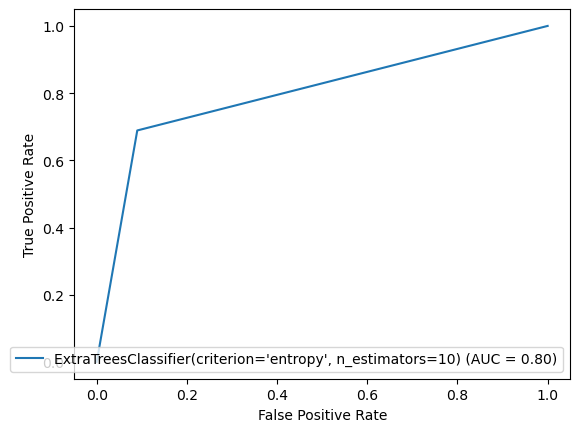

In [215]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_new)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=ex_new)
display.plot()

Here we have plotted the ROC curve for the model and the Auc value of the best model is 80%

In [210]:
#Saving the model
import joblib
import pickle
filename="Titanic Survived.pkl"
pickle.dump(ex_new,open(filename,'wb'))

In [211]:
#predicting the save model
model=pickle.load(open('Titanic Survived.pkl','rb'))

In [212]:
result=model.score(x_test,y_test)
print(result*100)

83.2089552238806


In [213]:
con=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
predicted,0,0,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,1,1,0,0
orginal,0,0,1,1,0,1,1,1,0,0,...,0,1,0,0,0,1,1,1,0,0
